# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Achmad Fauzihan Bagus Sajiwo
- **Email:** achmadfauzihanbagussajiwo@gmail.com
- **ID Dicoding:** good_sawo

## Menentukan Pertanyaan Bisnis

- Bagaimana pola perubahan jumlah penyewaan sepeda dari waktu ke waktu?
- Musim apa yang paling banyak dan paling sedikit pengguna?
- Bagaimana demografi pengguna bike sharing?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Mengimport library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat dataset day

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head() # menampilkan lima baris pertama dari DataFrame bernama day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat dataset hour

In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head() # menampilkan lima baris pertama dari DataFrame bernama hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Assessing data day

In [4]:
day_df.info() # menampilkan informasi tentang struktur DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isnull().sum() # menghitung jumlah nilai null (NaN)

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
day_df.describe() # memberikan ringkasan statistik deskriptif

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
day_df.duplicated().sum() # menghitung jumlah data duplikasi

0

Assessing data hour

In [8]:
hour_df.info() # menampilkan informasi tentang struktur DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isnull().sum() # menghitung jumlah nilai null (NaN)

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [10]:
hour_df.describe() # memberikan ringkasan statistik deskriptif

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
hour_df.duplicated().sum() # menghitung jumlah data duplikasi

0

**Insight:**
- Kolom dteday seharusnya bertipe data datetime
- Tidak ada data kosong/missing value (NaN)
- Tidak ada data duplikasi

### Cleaning Data

Untuk memudahkan dalam mengexplor dan memvisualisasi data, terdapat beberapa perubahan:
- tipe data kolom dteday diubah menjadi tipe data datetime
- tipe data kolom season, mnth, weekday, workingday dan weathersit diubah menjadi tipe data category
- penyesuaian nama kolom yr, mnth, hr, weekday dan cnt agar mudah dibaca dan dipahami
- mengkonversi isi kolom season, yr, mnth, weekday, workingday dan weathersit agar mudah dibaca dan dipahami

**Mengubah tipe data kolom**

In [12]:
datetime_columns = ["dteday"] # mengubah tipe data kolom dteday dari object menjadi datetime pada hour_df

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [13]:
datetime_columns = ["dteday"] # mengubah tipe data kolom dteday dari object menjadi datetime pada day_df

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [14]:
# mengubah tipe data kolom season, mnth, weekday, workingday dan weathersit dari int menjadi category pada hour_df
category_columns = ["season", "mnth", "weekday", "workingday", "weathersit"]

for column in category_columns:
    hour_df[column] = hour_df[column].astype("category")

In [15]:
# mengubah tipe data kolom season, mnth, weekday, workingday dan weathersit dari int menjadi category pada day_df
category_columns = ["season", "mnth", "weekday", "workingday", "weathersit"]

for column in category_columns:
    day_df[column] = day_df[column].astype("category")

In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [17]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(5), datetime64

**menyesuaikan nama kolom**

In [18]:
# menyesuaikan nama kolom pada hour_df agar mudah dibaca dan dipahami
hour_df.rename(columns={'yr':'year','hr':'hour','mnth':'month','weekday':'day', 'cnt':'count'},inplace=True)

In [19]:
# menyesuaikan nama kolom pada day_df agar mudah dibaca dan dipahami
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'day', 'cnt':'count'},inplace=True)

**mengonversi isi kolom**

In [20]:
# mengonversi isi kolom season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

if day_df["season"].dtype.name == "category":
    day_df["season"] = day_df["season"].cat.rename_categories(season_mapping)

if hour_df["season"].dtype.name == "category":
    hour_df["season"] = hour_df["season"].cat.rename_categories(season_mapping)

In [21]:
# mengonversi isi kolom year menjadi: 0:2011, 1:2012
year_mapping = {0: 2011, 1: 2012}

day_df["year"] = day_df["year"].replace(year_mapping)
hour_df["year"] = hour_df["year"].replace(year_mapping)

In [22]:
# mengonversi isi kolom month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

if day_df["month"].dtype.name == "category":
    day_df["month"] = day_df["month"].cat.rename_categories(month_mapping)

if hour_df["month"].dtype.name == "category":
    hour_df["month"] = hour_df["month"].cat.rename_categories(month_mapping)

In [23]:
# mengonversi isi kolom day menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
week_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}

if day_df["day"].dtype.name == "category":
    day_df["day"] = day_df["day"].cat.rename_categories(week_mapping)
else:
    day_df["day"] = day_df["day"].replace(week_mapping)

if hour_df["day"].dtype.name == "category":
    hour_df["day"] = hour_df["day"].cat.rename_categories(week_mapping)
else:
    hour_df["day"] = hour_df["day"].replace(week_mapping)

In [24]:
# mengonversi isi kolom workingday menjadi: 0:Weekend, 1:Weekday
workingday_mapping = {0: 'Weekend', 1: 'Weekday'}

if day_df["workingday"].dtype.name == "category":
    day_df["workingday"] = day_df["workingday"].cat.rename_categories(workingday_mapping)
else:
    day_df["workingday"] = day_df["workingday"].replace(workingday_mapping)

if hour_df["workingday"].dtype.name == "category":
    hour_df["workingday"] = hour_df["workingday"].cat.rename_categories(workingday_mapping)
else:
    hour_df["workingday"] = hour_df["workingday"].replace(workingday_mapping)

In [25]:
# mengonversi isi kolom weathersit menjadi: 1:Clear, 2:Misty, 3:Light_rain 4:Heavy_rain
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light_rain', 4: 'Heavy_rain'}

if day_df["weathersit"].dtype.name == "category":
    day_df["weathersit"] = day_df["weathersit"].cat.rename_categories(weather_mapping)
else:
    day_df["weathersit"] = day_df["weathersit"].replace(weather_mapping)

if hour_df["weathersit"].dtype.name == "category":
    hour_df["weathersit"] = hour_df["weathersit"].cat.rename_categories(weather_mapping)
else:
    hour_df["weathersit"] = hour_df["weathersit"].replace(weather_mapping)

In [26]:
hour_df.head()

,instant,dteday,season,year,month,hour,holiday,day,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Weekend,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Weekend,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Weekend,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Weekend,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Weekend,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
day_df.head()

,instant,dteday,season,year,month,holiday,day,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Weekend,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Weekend,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Weekday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Weekday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Weekday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Tipe data pada kolom dteday sudah berubah menjadi tipe data datetime
- Tipe data kolom season, mnth, weekday, workingday dan weathersit sudah berubah menjadi tipe data category

## Exploratory Data Analysis (EDA)

### Explore hour_df

In [28]:
# melihat ringkasan statistik dari semua kolom, termasuk kolom numerik, kategorikal
hour_df.describe(include="all")

,instant,dteday,season,year,month,hour,holiday,day,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,NaN,Sat,Weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [29]:
hour_df.groupby(by=['hour']).agg({
    'casual': ['mean'],
    'registered': ['mean'],
    'count': ['max', 'min', 'mean']
})

casual  registered count                
           mean        mean   max min        mean
hour                                             
0     10.158402   43.739669   283   2   53.898072
1      6.504144   26.871547   168   1   33.375691
2      4.772028   18.097902   132   1   22.869930
3      2.715925    9.011478    79   1   11.727403
4      1.253945    5.098996    28   1    6.352941
5      1.411437   18.478382    66   1   19.889819
6      4.161379   71.882759   213   1   76.044138
7     11.055021  201.009629   596   1  212.064649
8     21.679505  337.331499   839   5  359.011004
9     30.891334  188.418157   426  14  219.309491
10    46.477304  127.191197   539   8  173.668501
11    59.540578  148.602476   663  10  208.143054
12    68.293956  185.021978   776   3  253.315934
13    72.308642  181.352538   760  11  253.661180
14    75.567901  165.381344   750  12  240.949246
15    74.905350  176.327846   750   7  251.233196
16    73.745205  238.238356   783  11  311.983562
17    74.273973  387.178082   976  15  461.452055
18    61.120879  364.390110   977  23  425.510989
19    48.770604  262.752747   743  11  311.523352
20    36.233516  189.796703   567  11  226.030220
21    28.255495  144.059066   584   6  172.314560
22    22.252747  109.082418   502   9  131.335165
23    15.199176   72.631868   256   2   87.831044

In [30]:
hour_df.groupby("hour", observed=False)["count"].sum().to_frame()

,count
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


**Insight:**
- berdasarkan tabel diatas, diketahui bahwa pada pukul **17** merupakan rata-rata terbesar dimana banyak pengguna melakukan penyewaan diantara pukul-pukul lain, yaitu sebesar **461.452055**

### Explore day_df

In [31]:
# melihat ringkasan statistik dari semua kolom, termasuk kolom numerik, kategorikal
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,day,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.000000,731,731.000000,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Jan,NaN,Sun,Weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [32]:
day_df.groupby(by=['day'], observed=False).agg({
    'casual': ['mean'],
    'registered': ['mean'],
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
            mean         mean   max   min         mean
day                                                   
Sun  1338.295238  2890.533333  8227   605  4228.828571
Mon   674.133333  3663.990476  7525    22  4338.123810
Tue   556.182692  3954.480769  7767   683  4510.663462
Wed   551.144231  3997.394231  8173   441  4548.538462
Thu   590.961538  4076.298077  7804   431  4667.259615
Fri   752.288462  3938.000000  8362  1167  4690.288462
Sat  1465.257143  3085.285714  8714   627  4550.542857

In [33]:
day_df.groupby("day", observed=False)["count"].sum().to_frame()

,count
day,
Sun,444027
Mon,455503
Tue,469109
Wed,473048
Thu,485395
Fri,487790
Sat,477807


**Insight:**
- berdasarkan tabel diatas, diketahui bahwa hari **Friday** merupakan rata-rata terbesar dimana banyak pengguna melakukan penyewaan diantara hari-hari lain, yaitu sebesar **4690**

In [34]:
day_df.groupby(by=['month'], observed=False).agg({
    'casual': ['mean'],
    'registered': ['mean'],
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
              mean         mean   max   min         mean
month                                                   
Jan     194.225806  1982.112903  4521   431  2176.338710
Feb     262.508772  2392.789474  5062  1005  2655.298246
Mar     716.838710  2975.419355  8362   605  3692.258065
Apr    1013.366667  3471.533333  7460   795  4484.900000
May    1214.274194  4135.500000  8294  2633  5349.774194
Jun    1231.766667  4540.600000  8120  3767  5772.366667
Jul    1260.596774  4303.080645  8173  3285  5563.677419
Aug    1161.919355  4502.500000  7865  1115  5664.419355
Sep    1172.050000  4594.466667  8714  1842  5766.516667
Oct     963.870968  4235.354839  8156    22  5199.225806
Nov     610.050000  3637.133333  6852  1495  4247.183333
Dec     349.887097  3053.919355  6606   441  3403.806452

In [35]:
day_df.groupby("month", observed=False)["count"].sum().to_frame()

,count
month,
Jan,134933
Feb,151352
Mar,228920
Apr,269094
May,331686
Jun,346342
Jul,344948
Aug,351194
Sep,345991


**Insight:**
- berdasarkan tabel diatas, diketahui bahwa bulan **Agustus** merupakan bulan dimana banyak pengguna melakukan penyewaan diantara bulan-bulan lain, yaitu sebesar **351194**

In [36]:
day_df.groupby(by=['season'], observed=False).agg({
    'casual': ['mean'],
    'registered': ['mean'],
    'count': ['max', 'min', 'mean']
})

casual   registered count                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

In [37]:
day_df.groupby("season", observed=False)["count"].sum().to_frame()

,count
season,
Spring,471348
Summer,918589
Fall,1061129
Winter,841613


**Insight:**
- berdasarkan tabel diatas, diketahui bahwa musim **fall (gugur)** merupakan musim dengan banyak penyewa, yaitu sebesar **1061129**

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola perubahan jumlah penyewaan sepeda dari waktu ke waktu?

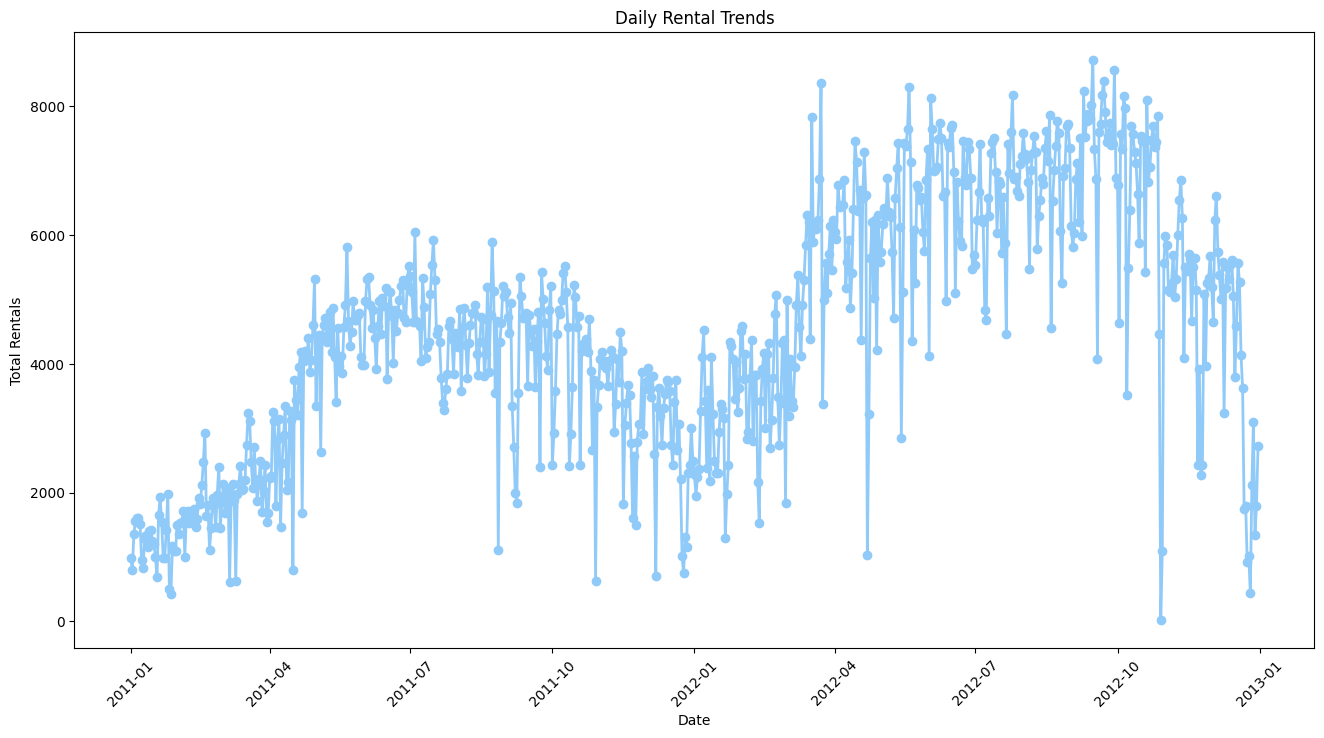

In [38]:
# Filter berdasarkan rentang tanggal (misalnya, dari dataset)
start_date = day_df['dteday'].min()
end_date = day_df['dteday'].max()

filtered_day_df = day_df[(day_df['dteday'] >= start_date) & (day_df['dteday'] <= end_date)]

# Membuat grafik Daily Rental Trends
plt.figure(figsize=(16, 8))
plt.plot(filtered_day_df['dteday'], filtered_day_df['count'], marker='o', linewidth=2, color="#90CAF9")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.title("Daily Rental Trends")
plt.xticks(rotation=45)
plt.show()

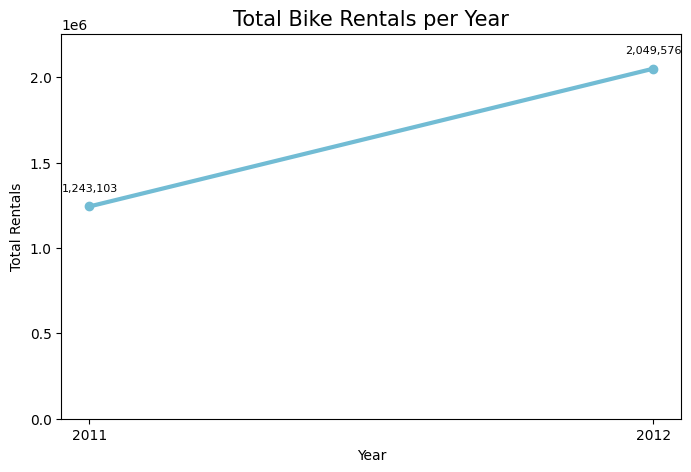

In [39]:
# Pastikan 'year' bertipe integer
day_df["year"] = day_df["year"].astype(int)

# Agregasi jumlah penyewaan per tahun
yearly_rentals = day_df.groupby("year", observed=False)["count"].sum().reset_index()

# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(yearly_rentals["year"], yearly_rentals["count"], marker='o', linewidth=3, color="#72BCD4")

# Tambahkan angka di atas titik data
for i, txt in enumerate(yearly_rentals["count"]):
    plt.text(
        yearly_rentals["year"][i], txt + 90000,  # Tambahkan jarak agar tidak bertabrakan
        f"{txt:,}", fontsize=8, fontweight="medium", color="black",
        ha="center"
    )

plt.title("Total Bike Rentals per Year", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Total Rentals")
plt.xticks(yearly_rentals["year"])
plt.ylim(0, yearly_rentals["count"].max() * 1.1)  # Mulai dari 0

plt.show()

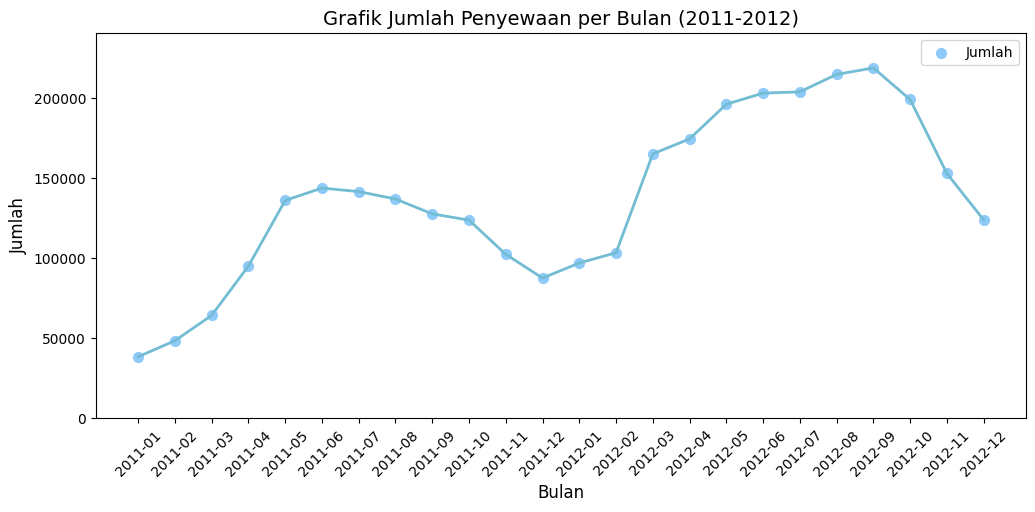

In [40]:
# Menghitung jumlah penyewaan per bulan dari 2011 hingga 2012
day_df["year_month"] = day_df["dteday"].dt.to_period("M")  # Menggabungkan Tahun & Bulan
monthly_counts = day_df.groupby("year_month")["count"].sum()

# Membuat figure
plt.figure(figsize=(12, 5))

# Scatter plot untuk menampilkan titik-titik
plt.scatter(monthly_counts.index.astype(str), monthly_counts.values, c="#90CAF9", s=50, marker='o', label="Jumlah")

# Line plot untuk menunjukkan pola
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, linestyle='-', linewidth=2, color="#72BCD4")

# Mulai sumbu Y dari 0
plt.ylim(0, monthly_counts.max() * 1.1)

# Penamaan sumbu
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('Grafik Jumlah Penyewaan per Bulan (2011-2012)', fontsize=14)

# Rotasi label sumbu X agar lebih mudah dibaca
plt.xticks(rotation=45)

# Menampilkan legenda
plt.legend()

plt.show()

Dari grafik di atas, pola yang diberikan berubah-ubah. Jumlah penyewaan mengalami peningkatan setiap tahun. Pada tahun 2011 total penyewaan sekitar **1,2 juta** dan pada tahun 2012 total penyewaan meningkat hingga **2 juta**. Grafik tersebut menunjukkan pertumbuhan yang positif.

### Pertanyaan 2: Musim apa yang paling banyak dan paling sedikit pengguna?

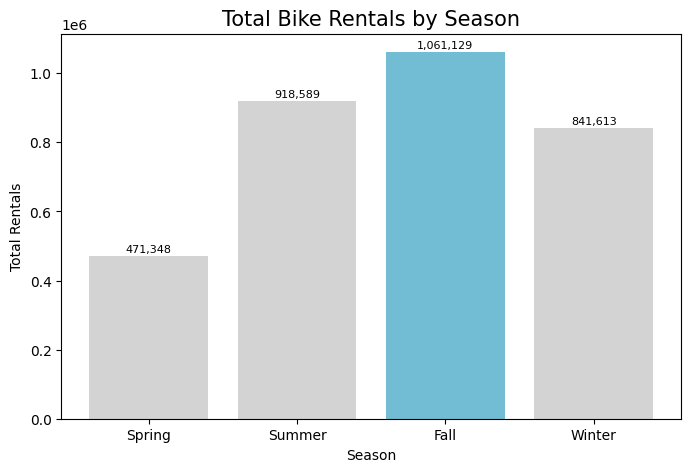

In [41]:
# Agregasi jumlah penyewaan per musim
season_rentals = day_df.groupby("season", observed=False)["count"].sum().reset_index()

# Menentukan musim dengan penyewaan terbanyak
max_season = season_rentals["count"].idxmax()

# Warna default dan menyoroti musim dengan penyewaan terbanyak
colors = ["#D3D3D3"] * len(season_rentals)
colors[max_season] = "#72BCD4"  # Warna berbeda untuk musim dengan penyewaan terbanyak

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(season_rentals["season"], season_rentals["count"], color=colors)
plt.title("Total Bike Rentals by Season", fontsize=15)
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.xticks(season_rentals["season"], labels=["Spring", "Summer", "Fall", "Winter"])

# Tambahkan angka di atas setiap bar
for i, txt in enumerate(season_rentals["count"]):
    plt.text(season_rentals["season"][i], txt + 10000, f"{txt:,}",
             fontsize=8, fontweight="medium", ha="center")

plt.show()

Musim dengan jumlah penyewaan terbanyak: **Fall**

Musim dengan jumlah penyewaan tersedikit: **Spring**

### Pertanyaan 3: Bagaimana demografi pengguna bike sharing?

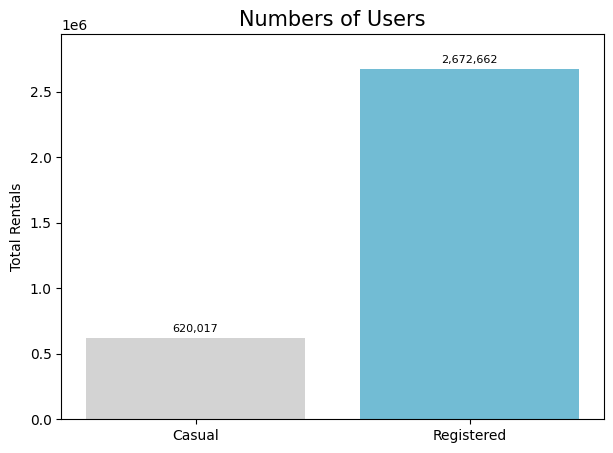

In [47]:
# Agregasi jumlah penyewaan untuk pengguna casual dan registered
total_casual = day_df["casual"].sum()
total_registered = day_df["registered"].sum()

# Data untuk plotting
categories = ["Casual", "Registered"]
values = [total_casual, total_registered]
colors = ["#D3D3D3", "#72BCD4"]  # Warna berbeda untuk masing-masing kategori

# Buat bar chart
plt.figure(figsize=(7, 5))
plt.bar(categories, values, color=colors)

# Tambahkan angka di atas setiap bar
for i, txt in enumerate(values):
    plt.text(i, txt + 50000, f"{txt:,}", fontsize=8, fontweight="medium", ha="center")

# Judul dan label
plt.title("Numbers of Users", fontsize=15)
plt.ylabel("Total Rentals")
plt.ylim(0, max(values) * 1.1)  # Mulai dari 0 dan memberi sedikit ruang atas

plt.show()

Total penyewaan oleh pengguna casual: **620,017**

Total penyewaan oleh pengguna registered: **2,672,662**

## Conclusion

- Dari grafik di atas, pola yang diberikan berubah-ubah. Jumlah penyewaan mengalami peningkatan setiap tahun. Pada tahun 2011 total penyewaan sekitar 1,2 juta dan pada tahun 2012 total penyewaan meningkat hingga 2 juta. Grafik tersebut menunjukkan pertumbuhan yang positif.
- Musim dengan jumlah penyewaan terbanyak adalah musim **Fall** dan musim dengan jumlah penyewaan tersedikit adalah musim **Spring**
- Total penyewaan oleh pengguna casual adalah **620,017** pengguna dan total penyewaan oleh pengguna registered adalah **2,672,662** pengguna

## Analisis Lanjutan (Opsional)

### 1. Clustering Berdasarkan Jam Sibuk dan Tidak Sibuk

In [43]:
# Menentukan kuartil untuk jumlah penyewaan per jam
q1 = hour_df["count"].quantile(0.25)
q3 = hour_df["count"].quantile(0.75)

# Menentukan kategori kepadatan pengguna
def categorize_busy_hours(count):
    if count < q1:
        return "Low Activity"
    elif count > q3:
        return "High Activity"
    else:
        return "Medium Activity"

# Membuat kolom kategori
hour_df["activity_cluster"] = hour_df["count"].apply(categorize_busy_hours)

# Menampilkan contoh hasil clustering
hour_df[["hour", "count", "activity_cluster"]].sample(10)

,hour,count,activity_cluster
7024,7,314,High Activity
3689,15,183,Medium Activity
7271,14,201,Medium Activity
1612,16,244,Medium Activity
78,10,42,Medium Activity
8074,2,4,Low Activity
16688,3,8,Low Activity
16472,2,32,Low Activity
16360,10,139,Medium Activity
6734,4,7,Low Activity


### 2. RFM Analysis

In [44]:
# Pastikan dteday dalam format datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

# Tentukan tanggal referensi sebagai tanggal terakhir dalam dataset
reference_date = day_df["dteday"].max()

# Hitung RFM berdasarkan kategori 'season'
rfm_df = day_df.groupby("season", observed=False).agg(
    Recency=("dteday", lambda x: (reference_date - x.max()).days),  # Selisih hari dari transaksi terakhir
    Frequency=("dteday", "count"),  # Total jumlah hari dengan penyewaan
    Monetary=("count", "sum")  # Total jumlah penyewaan
).reset_index()

# Tampilkan hasil
print(rfm_df)


   season  Recency  Frequency  Monetary
0  Spring        0        181    471348
1  Summer      194        184    918589
2    Fall      100        188   1061129
3  Winter       11        178    841613


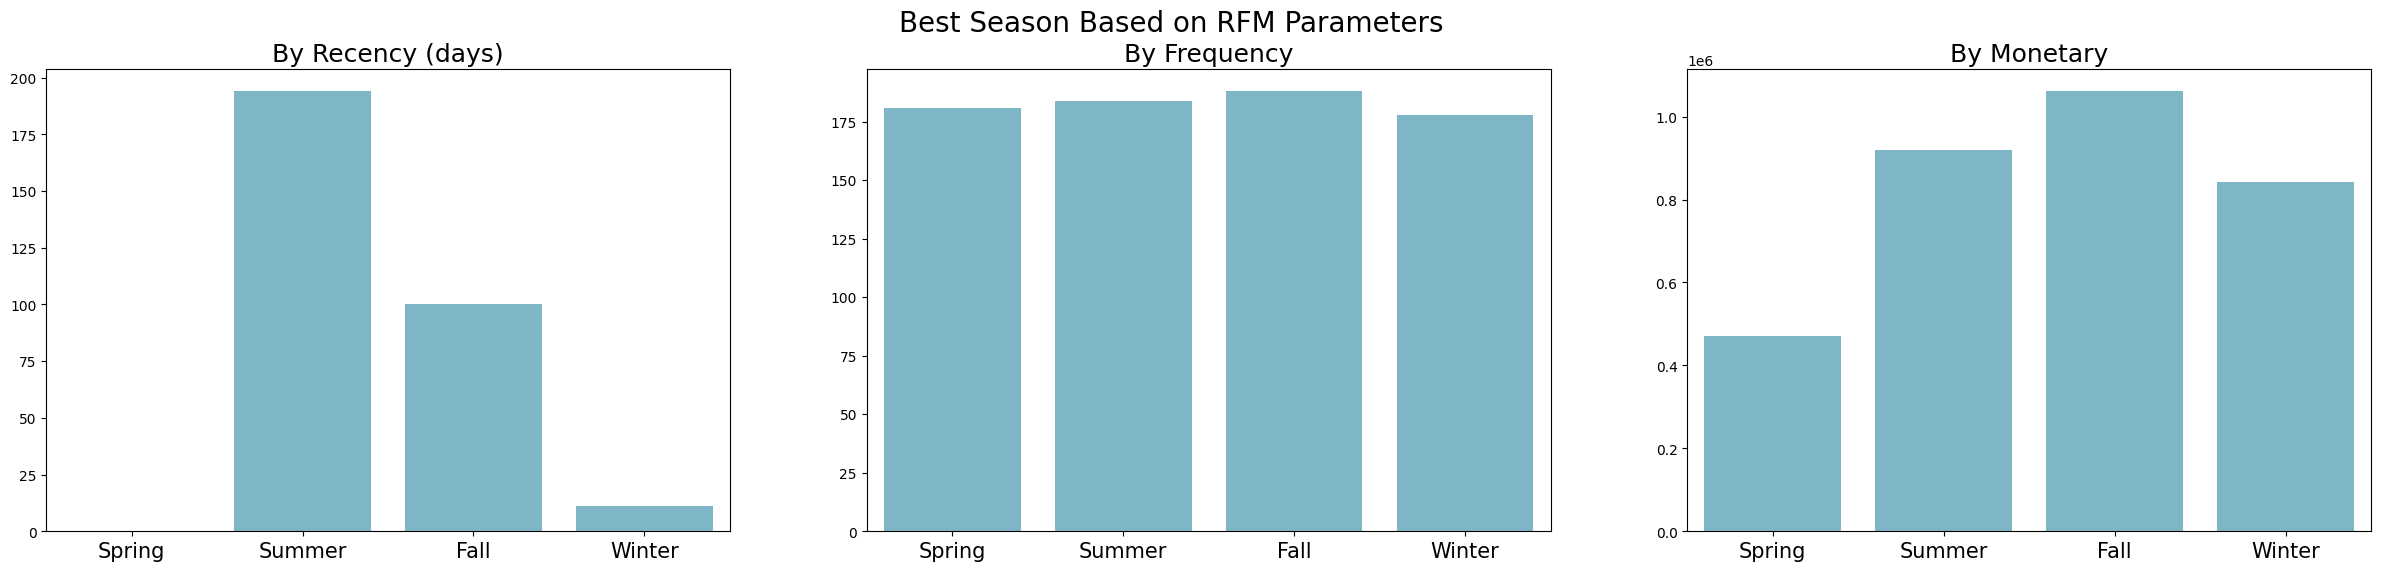

In [46]:
# Visualisasi RFM dalam bentuk barplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# grafik receny
sns.barplot(y="Recency", x="season", hue="season", data=rfm_df.sort_values(by="Recency", ascending=True), palette=colors, ax=ax[0], legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# grafik frequency
sns.barplot(y="Frequency", x="season", hue="season", data=rfm_df.sort_values(by="Frequency", ascending=False), palette=colors, ax=ax[1], legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# grafik monetery
sns.barplot(y="Monetary", x="season", hue="season", data=rfm_df.sort_values(by="Monetary", ascending=False), palette=colors, ax=ax[2], legend=False)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Season Based on RFM Parameters", fontsize=20)
plt.show()